Este colab fue desarrollado por Arnold Charry Armero

# Melrose Oil Refinery

Le han puesto a cargo de la refinería de petróleo de Melrose.
La refinería produce gas y combustible para calefacción a partir de petróleo crudo.
El gas se vende a 8 dólares el barril y debe tener una “ley” promedio.
nivel” de al menos 9. El combustible para calefacción se vende a 6 dólares el barril y debe tener un nivel de calidad promedio de al menos 7. Como máximo, 2.000
Se pueden vender barriles de gas y 600 barriles de gasóleo para calefacción.
El crudo entrante se puede procesar mediante uno de tres métodos.
El rendimiento por barril y el costo por barril de cada procesamiento.
El método se muestra en la Tabla 32. Por ejemplo, si refinamos 1
barril de crudo entrante por el método 1, nos cuesta $\$3.40$ y
rinde 0,2 barriles de grado 6, 0,2 barriles de grado 8 y 0,6
barriles de grado 10.
Antes de ser transformado en gas y gasóleo para calefacción,
Los grados 6 y 8 procesados ​​pueden enviarse a través del catalizador.
galleta para mejorar su calidad. Por 1,30 dólares el barril, un barril de grado 6 puede “fracturarse” para convertirlo en un barril de grado 8. Por ejemplo,
$\$2$ por barril, un barril de grado 8 puede descomponerse en un barril de grado 10. Cualquier sobrante de petróleo procesado o craqueado que
No se puede utilizar para calefacción. El gasóleo o el gas deben eliminarse en
un costo de $\$0,20$ por barril. Determinar cómo maximizar la
beneficio de la refinería

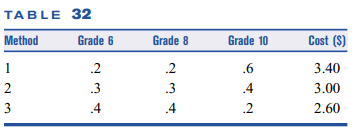

##Conjuntos

$ i = \text{Barril procesado o no procesado por } i$

$ j = \text{Grado del barril indexado por } j$

$ k = \text{Método indexado por } k$

## Parámetros

$I_{ij} = \textrm{Ingreso de vender el gas } j \textrm{ utilizando el procesamiento } i$

$C_{ij} = \textrm{Costo de producir el gas } j \textrm{ utilizando el procesamiento } i$

$CM_{k} = \textrm{Costo de manejar un método } k $

$D_{j} = \textrm{Cantidad máxima de la demanda } j $

$P_{j} = \textrm{Promedio de calidad } j$

$CP_{jk} = \textrm{Transformación del gas } j \textrm{ utilizando el método } k$

$IM_{ij} = \textrm{Grado de pureza } j \textrm{ utilizando el crudo } i$

$IMM_{ij} = \textrm{Grado de pureza } j \textrm{ utilizando el crudo } i$


## Variables de decisión

$ x_{ij} = \textrm{Cantidad producida de gas sin procesar }j \textrm{ con el procesamiento }i$

$ y_{ij} = \textrm{Cantidad producida de gas procesado }j \textrm{ con el procesamiento }i$

$ m_{k} = \textrm{Método de refinería }k $

## Función Objetivo

$$ \textrm{Max } z = \sum_{j = 1}^{n} \sum_{i = 1}^{n} I_{ij}\: x_{ij} + \sum_{j = 1}^{n} \sum_{i = 1}^{n} IU_{ij}\: y_{ij} + \sum_{j = 1}^{n} \sum_{i = 1}^{n} C_{ij}\: x_{ij} + \sum_{j = 1}^{n} \sum_{i = 1}^{n} CU_{ij}\: y_{ij} - \sum_{k = 1}^{n}CM_{k}\: m_{k} $$

## Restricciones

Se tiene un máximo de barriles de gas por demanda,

$$ \sum_{i = 1}^{n} x_{ij} + \sum_{i = 1}^{n} y_{ij} \leq D_{j}, \forall j $$

Se debe tener un estándar de calidad,

$$ \sum_{i = 1}^{n} x_{ij} IM_{ij} + \sum_{i = 1}^{n} y_{ij} IMM_{ij} \geq  P_{j} (\sum_{i = 1}^{n} x_{ij} + \sum_{i = 1}^{n} y_{ij}),  \forall j  $$

No se puede producir más de los métodos,

$$ \sum_{j = 1}^{n} x_{ij} B_{ij} + \sum_{j = 1}^{n} y_{ij} BI_{ij} \leq \sum_{k = 1}^{n} CP_{ik} m_{k},  \forall i  $$




In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 30.8 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
gas = range(3)
proceso = range(2)
metodo = range(3)

In [ ]:
#Parámetros

I = [[8, 6], [8, 6], [8, 6]]

IU = [[8, 6], [8, 6]]

C = [[0.2, 0.2], [0.2, 0.2], [0.2, 0.2]]

CU = [[-1.1, -1.1], [-1.8, -1.8]]

CM = [3.6, 3.2, 2.8]

D = [2000, 600]

IM = [[6, 6], [8, 8], [10, 10]]

IMM = [[8, 8], [10, 10]]

P = [9, 7]

CP = [[0.2, 0.2, 0.6], [0.3, 0.3, 0.4], [0.4, 0.4, 0.2]]

B = [[1, 1], [1, 1], [1, 1]]

BI = [[1, 1], [1, 1]]

In [80]:
# Crear la instancia del modelo
model = LpProblem(name="Melrose_Oil", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (gas, proceso), 0, None, LpContinuous)
Y = LpVariable.dicts("Y", (gas, gas), 0, None, LpContinuous)
M = LpVariable.dicts("M", (metodo), 0, None, LpContinuous)

# Agregar la función objetivo
model += (lpSum([[I[i][j] * X[i][j] for i in gas] for j in proceso]) + lpSum([[IU[i][j] * Y[i][j] for i in range(2)] for j in proceso])
         + lpSum([[C[i][j] * X[i][j] for i in gas] for j in proceso]) + lpSum([[CU[i][j] * Y[i][j] for i in range(2)] for j in proceso])
         - lpSum([CM[k] * M[k] for k in metodo]))

# Agregar las restricciones

for j in proceso:
  model += lpSum([X[i][j] for i in gas]) + lpSum([Y[i][j] for i in range(2)]) <= D[j]

for j in proceso:
  model += lpSum([X[i][j] * IM[i][j] for i in gas]) + lpSum([Y[i][j] * IMM[i][j] for i in range(2)]) >= P[j] * (lpSum([X[i][j] for i in gas]) + lpSum([Y[i][j] for i in range(2)]))

for i in range(2):
  model += lpSum([X[i][j] * B[i][j] for j in proceso]) + lpSum([Y[i][j] * BI[i][j] for j in proceso]) <= lpSum([CP[k][i] * M[k] for k in metodo])

for i in range(2, 3):
  model += lpSum([X[i][j] * B[i][j] for j in proceso]) <= lpSum([CP[k][i] * M[k] for k in metodo])

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
M_0 = 0.0
M_1 = 2400.0
M_2 = 200.0
X_0_0 = 0.0
X_0_1 = 300.0
X_1_0 = 800.0
X_1_1 = 0.0
X_2_0 = 1000.0
X_2_1 = 0.0
Y_0_0 = 200.0
Y_0_1 = 300.0
Y_1_0 = 0.0
Y_1_1 = 0.0
Utilidades totales = $ 11230.0
